This notebook contains analysis on average mortgage values for years 1999 to 2016.

In [1]:
#Importing packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

import seaborn as sns

In [2]:
#Importing the data as panda dataframe
df_mortgage = pd.read_csv('dbAvgMortgage1999-2016.csv')

df_mortgage.head()

,REF_DATE,GEO,DGUID,Assets and debts,Age group,Economic family type,Statistics,Confidence intervals,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1999,"Montréal, Quebec",2011S0503462,Mortgage on principal residence,All ages,Economic families and persons not in an econom...,Average value for those holding asset or debt,Estimate,2016 constant dollars,350,units,0,v114977559,15.20.1.1.6.1,95300.0,NaN,NaN,NaN,0
1,2005,"Montréal, Quebec",2011S0503462,Mortgage on principal residence,All ages,Economic families and persons not in an econom...,Average value for those holding asset or debt,Estimate,2016 constant dollars,350,units,0,v114977559,15.20.1.1.6.1,118700.0,NaN,NaN,NaN,0
2,2012,"Montréal, Quebec",2011S0503462,Mortgage on principal residence,All ages,Economic families and persons not in an econom...,Average value for those holding asset or debt,Estimate,2016 constant dollars,350,units,0,v114977559,15.20.1.1.6.1,160600.0,NaN,NaN,NaN,0
3,2016,"Montréal, Quebec",2011S0503462,Mortgage on principal residence,All ages,Economic families and persons not in an econom...,Average value for those holding asset or debt,Estimate,2016 constant dollars,350,units,0,v114977559,15.20.1.1.6.1,167000.0,NaN,NaN,NaN,0
4,1999,"Montréal, Quebec",2011S0503462,Mortgage on principal residence,Under 65 years,Economic families and persons not in an econom...,Average value for those holding asset or debt,Estimate,2016 constant dollars,350,units,0,v114977577,15.20.2.1.6.1,97000.0,NaN,NaN,NaN,0


In [3]:
#Quick look at the data:
df_mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REF_DATE              140 non-null    int64  
 1   GEO                   140 non-null    object 
 2   DGUID                 140 non-null    object 
 3   Assets and debts      140 non-null    object 
 4   Age group             140 non-null    object 
 5   Economic family type  140 non-null    object 
 6   Statistics            140 non-null    object 
 7   Confidence intervals  140 non-null    object 
 8   UOM                   140 non-null    object 
 9   UOM_ID                140 non-null    int64  
 10  SCALAR_FACTOR         140 non-null    object 
 11  SCALAR_ID             140 non-null    int64  
 12  VECTOR                140 non-null    object 
 13  COORDINATE            140 non-null    object 
 14  VALUE                 103 non-null    float64
 15  STATUS                4

In [4]:
#Checking for columns with only one unique value (they can be dropped since they hold one similar value for all rows):
for col in df_mortgage:
    print("Unique values in column", col, "are:", df_mortgage[col].unique())

Unique values in column REF_DATE are: [1999 2005 2012 2016]
Unique values in column GEO are: ['Montréal, Quebec' 'Toronto, Ontario' 'Calgary, Alberta'
 'Edmonton, Alberta' 'Vancouver, British Columbia']
Unique values in column DGUID are: ['2011S0503462' '2011S0503535' '2011S0503825' '2011S0503835'
 '2011S0503933']
Unique values in column Assets and debts are: ['Mortgage on principal residence']
Unique values in column Age group are: ['All ages' 'Under 65 years' 'Under 35 years' '35 to 44 years'
 '45 to 54 years' '55 to 64 years' '65 years and older']
Unique values in column Economic family type are: ['Economic families and persons not in an economic family']
Unique values in column Statistics are: ['Average value for those holding asset or debt']
Unique values in column Confidence intervals are: ['Estimate']
Unique values in column UOM are: ['2016 constant dollars']
Unique values in column UOM_ID are: [350]
Unique values in column SCALAR_FACTOR are: ['units']
Unique values in column SC

In [5]:
#Dropping the empty columns (columns with 0 non-null count):
df_mortgage = df_mortgage.drop(['SYMBOL', 'TERMINATED'], axis=1)

#Dropping columns that do not contribute information for the analysis:
df_mortgage = df_mortgage.drop(['DGUID', 'Assets and debts', 'Economic family type', 'Statistics', 'Confidence intervals', 
                              'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 
                              'STATUS', 'DECIMALS'], axis=1)

df_mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   REF_DATE   140 non-null    int64  
 1   GEO        140 non-null    object 
 2   Age group  140 non-null    object 
 3   VALUE      103 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ KB


In [6]:
#Taking a closer look at the "Age group" column:
df_mortgage['Age group'].unique()

array(['All ages', 'Under 65 years', 'Under 35 years', '35 to 44 years',
       '45 to 54 years', '55 to 64 years', '65 years and older'],
      dtype=object)

In [7]:
#For consistency, the "Under 35 years" can be changed to "34 years and younger".
df_mortgage['Age group'] = df_mortgage['Age group'].replace('Under 35 years', '34 years and younger')

df_mortgage

,REF_DATE,GEO,Age group,VALUE
0,1999,"Montréal, Quebec",All ages,95300.0
1,2005,"Montréal, Quebec",All ages,118700.0
2,2012,"Montréal, Quebec",All ages,160600.0
3,2016,"Montréal, Quebec",All ages,167000.0
4,1999,"Montréal, Quebec",Under 65 years,97000.0
...,...,...,...,...
135,2016,"Vancouver, British Columbia",55 to 64 years,232100.0
136,1999,"Vancouver, British Columbia",65 years and older,NaN
137,2005,"Vancouver, British Columbia",65 years and older,NaN
138,2012,"Vancouver, British Columbia",65 years and older,NaN


In [8]:
#Selecting rows of data which contain information on Toronto, Vancouver, and Calgary markets:

df_toronto_mort = df_mortgage.loc[df_mortgage['GEO'] == 'Toronto, Ontario']
df_vancouver_mort = df_mortgage.loc[df_mortgage['GEO'] == 'Vancouver, British Columbia']
df_calgary_mort = df_mortgage.loc[df_mortgage['GEO'] == 'Calgary, Alberta']

df_mortgage3 = pd.concat([df_toronto_mort, df_vancouver_mort, df_calgary_mort], axis=0)
df_mortgage3

,REF_DATE,GEO,Age group,VALUE
28,1999,"Toronto, Ontario",All ages,156600.0
29,2005,"Toronto, Ontario",All ages,194000.0
30,2012,"Toronto, Ontario",All ages,226000.0
31,2016,"Toronto, Ontario",All ages,299300.0
32,1999,"Toronto, Ontario",Under 65 years,157900.0
...,...,...,...,...
79,2016,"Calgary, Alberta",55 to 64 years,236500.0
80,1999,"Calgary, Alberta",65 years and older,NaN
81,2005,"Calgary, Alberta",65 years and older,NaN
82,2012,"Calgary, Alberta",65 years and older,NaN


In [9]:
#Checking for the number of missing values:
df_mortgage3['VALUE'].isnull().sum()

20

For filling the missing mortgage values, we can take a closer look at each city in each year to see whether a relationship can be identified between mortgage data and different age groups.

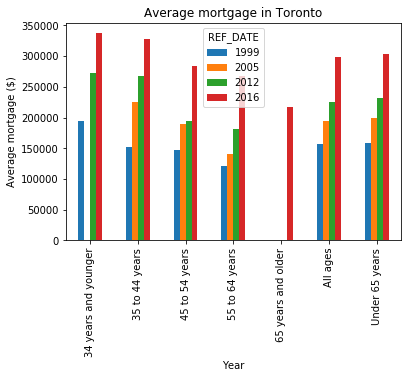

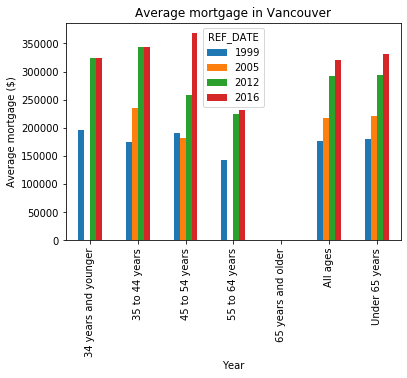

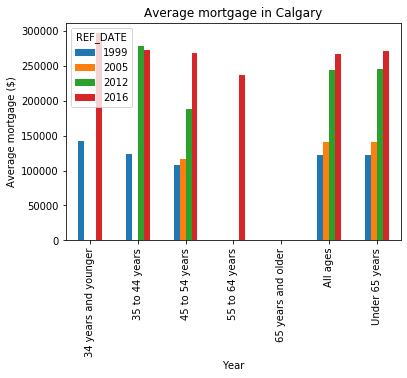

In [10]:
#FOR TORONTO:
ax1 = df_toronto_mort.groupby(['Age group', 'REF_DATE']).VALUE.mean().unstack().plot.bar()
ax1.set_title("Average mortgage in Toronto")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average mortgage ($)");

#FOR VANCOUVER:
ax2 = df_vancouver_mort.groupby(['Age group', 'REF_DATE']).VALUE.mean().unstack().plot.bar()
ax2.set_title("Average mortgage in Vancouver")
ax2.set_xlabel("Year")
ax2.set_ylabel("Average mortgage ($)");

#FOR CALGARY:
ax3 = df_calgary_mort.groupby(['Age group', 'REF_DATE']).VALUE.mean().unstack().plot.bar()
ax3.set_title("Average mortgage in Calgary")
ax3.set_xlabel("Year")
ax3.set_ylabel("Average mortgage ($)");

As seen in plots, the "65 years and older" category has a high number of missing values for all cities and in all years (except for Toronto in 2016, all other "65 years and older" data are missing). Therefore, this category will be dropped:

In [11]:
#Creating a dataframe without the "65 years and older" category:
df_mort1 = df_mortgage3.loc[df_mortgage['Age group'] != '65 years and older']

The plots show some trends between mortgage data and age groups and different years that we can use for imputing the missing data.
For example, older age groups tend to have lower mortgage values. 
Also, mortgage values show a general increasing trend from 1999 to 2016.
These values can be fitted to a curve and the missing data can be extrapolated using the parameters for the fit.

After all data are filled in, the average for all ages (under 65) can be calculated and compared with the available "Under 65 years" column to make sure the predicted data are in an acceptable range.

In [12]:
#Creating a dataframe without the "all ages" and "under 65 years" columns so they are not included in the curve fitting:

#The age groups of "all ages" and "under 65 years" are redundant since the other age groups already cover all ages.
df_mort = df_mort1.loc[(df_mort1['Age group'] != 'All ages') & (df_mort1['Age group'] != 'Under 65 years')]

In [13]:
#Creating dataframe for curve fitting for Toronto:
df1 = df_mort.loc[(df_mort['GEO'] == 'Toronto, Ontario') & (df_mort['REF_DATE'] == 1999)]
df2 = df_mort.loc[(df_mort['GEO'] == 'Toronto, Ontario') & (df_mort['REF_DATE'] == 2005)]
df3 = df_mort.loc[(df_mort['GEO'] == 'Toronto, Ontario') & (df_mort['REF_DATE'] == 2012)]
df4 = df_mort.loc[(df_mort['GEO'] == 'Toronto, Ontario') & (df_mort['REF_DATE'] == 2016)]

#Creating dataframe for curve fitting for Vancouver:
df5 = df_mort.loc[(df_mort['GEO'] == 'Vancouver, British Columbia') & (df_mort['REF_DATE'] == 1999)]
df6 = df_mort.loc[(df_mort['GEO'] == 'Vancouver, British Columbia') & (df_mort['REF_DATE'] == 2005)]
df7 = df_mort.loc[(df_mort['GEO'] == 'Vancouver, British Columbia') & (df_mort['REF_DATE'] == 2012)]
df8 = df_mort.loc[(df_mort['GEO'] == 'Vancouver, British Columbia') & (df_mort['REF_DATE'] == 2016)]

#Creating dataframe for curve fitting for Calgary:
df9 = df_mort.loc[(df_mort['GEO'] == 'Calgary, Alberta') & (df_mort['REF_DATE'] == 1999)]
df10 = df_mort.loc[(df_mort['GEO'] == 'Calgary, Alberta') & (df_mort['REF_DATE'] == 2005)]
df11 = df_mort.loc[(df_mort['GEO'] == 'Calgary, Alberta') & (df_mort['REF_DATE'] == 2012)]
df12 = df_mort.loc[(df_mort['GEO'] == 'Calgary, Alberta') & (df_mort['REF_DATE'] == 2016)]

for df in (df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12):
    print(df)
    print()

    REF_DATE               GEO             Age group     VALUE
36      1999  Toronto, Ontario  34 years and younger  193800.0
40      1999  Toronto, Ontario        35 to 44 years  152000.0
44      1999  Toronto, Ontario        45 to 54 years  147200.0
48      1999  Toronto, Ontario        55 to 64 years  121200.0

    REF_DATE               GEO             Age group     VALUE
37      2005  Toronto, Ontario  34 years and younger       NaN
41      2005  Toronto, Ontario        35 to 44 years  225500.0
45      2005  Toronto, Ontario        45 to 54 years  189200.0
49      2005  Toronto, Ontario        55 to 64 years  140000.0

    REF_DATE               GEO             Age group     VALUE
38      2012  Toronto, Ontario  34 years and younger  273200.0
42      2012  Toronto, Ontario        35 to 44 years  266900.0
46      2012  Toronto, Ontario        45 to 54 years  194500.0
50      2012  Toronto, Ontario        55 to 64 years  182000.0

    REF_DATE               GEO             Age group

For more accurate estimations, curve fitting was done only for dataframes with at least 3 availble values out of the total 5 age groups.

Therefore, curve fitting for Vancouver in year 2005 and for Calgary in years 2005 and 2012 was not done.

In [14]:
#For extrapolating the missing data:

from scipy.optimize import curve_fit

#Function to curve fit to the data:
def func(x, a, b, c):
    return a * (x ** 2) + b * x + c

#Initial parameter "guess", just for kicking off the optimization:
guess = (0.5, 0.5, 0.5)

#Curve fitting and extrapolating:
for df in (df1, df2, df3, df5, df7, df8, df9, df12):
    #Creating a copy of data for removing NaNs prior to curve fitting:
    fit_df = df.dropna()

    #Place to store function parameters for each column:
    col_params = {}

    #Curve fit:
    #Getting x and y:
    x = fit_df.index.astype(float).values
    y = fit_df['VALUE'].values
    #Curve fit column and get curve parameters:
    params = curve_fit(func, x, y, guess)
    #Store optimized parameters:
    col_params['VALUE'] = params[0]

    #Extrapolate:
    #Get the index values for NaNs in the column:
    x = df[pd.isnull(df['VALUE'])].index.astype(float).values
    #Extrapolate those points with the fitted function:
    df['VALUE'][x] = func(x, *col_params['VALUE'])
    
    df['Average for under 65'] = df['VALUE'].mean()
    
df_all_mort = pd.concat((df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12), axis=0)
df_all_mort

,REF_DATE,GEO,Age group,VALUE,Average for under 65
36,1999,"Toronto, Ontario",34 years and younger,193800.0,153550.0
40,1999,"Toronto, Ontario",35 to 44 years,152000.0,153550.0
44,1999,"Toronto, Ontario",45 to 54 years,147200.0,153550.0
48,1999,"Toronto, Ontario",55 to 64 years,121200.0,153550.0
37,2005,"Toronto, Ontario",34 years and younger,248900.0,200900.0
41,2005,"Toronto, Ontario",35 to 44 years,225500.0,200900.0
45,2005,"Toronto, Ontario",45 to 54 years,189200.0,200900.0
49,2005,"Toronto, Ontario",55 to 64 years,140000.0,200900.0
38,2012,"Toronto, Ontario",34 years and younger,273200.0,229150.0
42,2012,"Toronto, Ontario",35 to 44 years,266900.0,229150.0


In [15]:
#The rows containing missing values for Vancouver in year 2005 and for Calgary in years 2005 and 2012 will be dropped since
#there is not enough available data for an accurate curve fit.
df_all = df_all_mort.dropna(subset=['VALUE'], axis=0)

#Creating a dataframe with the available average values in the dataset for "under 65 years":
df_mort_with_avg = df_mort1.loc[df_mort1['Age group'] == 'Under 65 years']

#The average mortgage values for under 65 years that were obtained by curve fitting will be compared with the 
#available data in the original dataset. For this comparison, the dataframes that were not curve fitted will be dropped.
#The dataframes that were not curve fitted did not have an average calculated in the curve fitting code; therefore,
#the value in their "Average for under 65" column was NaN.
df_curvefitted = df_all.dropna(subset=['Average for under 65'], axis=0)

#Merging the two above dataframes so the averages can be compared:
df_compare = df_curvefitted.merge(df_mort_with_avg, on=['REF_DATE', 'GEO'], how='left')
df_compare.head()

,REF_DATE,GEO,Age group_x,VALUE_x,Average for under 65,Age group_y,VALUE_y
0,1999,"Toronto, Ontario",34 years and younger,193800.0,153550.0,Under 65 years,157900.0
1,1999,"Toronto, Ontario",35 to 44 years,152000.0,153550.0,Under 65 years,157900.0
2,1999,"Toronto, Ontario",45 to 54 years,147200.0,153550.0,Under 65 years,157900.0
3,1999,"Toronto, Ontario",55 to 64 years,121200.0,153550.0,Under 65 years,157900.0
4,2005,"Toronto, Ontario",34 years and younger,248900.0,200900.0,Under 65 years,199600.0


In [16]:
#For easier comparison, the average values will be put into a new dataframe.

avg1 = df_compare['VALUE_y']
avg2 = df_compare['Average for under 65']
ref_date = df_compare['REF_DATE']
geo = df_compare['GEO']
df_compare_values = pd.DataFrame({'Year':ref_date, 'City':geo, 'Average from dataset':avg1, 'Average from Calculation':avg2})
df_compare_values = df_compare_values.drop_duplicates(subset=None, keep='first')
df_compare_values

,Year,City,Average from dataset,Average from Calculation
0,1999,"Toronto, Ontario",157900.0,153550.0
4,2005,"Toronto, Ontario",199600.0,200900.0
8,2012,"Toronto, Ontario",232400.0,229150.0
12,1999,"Vancouver, British Columbia",180600.0,175975.0
16,2012,"Vancouver, British Columbia",294700.0,287450.0
20,2016,"Vancouver, British Columbia",331900.0,316975.0
24,1999,"Calgary, Alberta",122500.0,116550.0
28,2016,"Calgary, Alberta",271600.0,268675.0


As seen, the average values calculated from the predicted data are very close to the average values present in the original dataset. Therefore, our estimated predictions are in an acceptable range and have not resulted in off average values.

In [17]:
#The final cleaned and imputed dataframe with dropped missing values that could not be filled in is:
df_final = df_all.drop(['Average for under 65'], axis=1)
df_final = df_final.reset_index(drop=True)
df_final

,REF_DATE,GEO,Age group,VALUE
0,1999,"Toronto, Ontario",34 years and younger,193800.0
1,1999,"Toronto, Ontario",35 to 44 years,152000.0
2,1999,"Toronto, Ontario",45 to 54 years,147200.0
3,1999,"Toronto, Ontario",55 to 64 years,121200.0
4,2005,"Toronto, Ontario",34 years and younger,248900.0
5,2005,"Toronto, Ontario",35 to 44 years,225500.0
6,2005,"Toronto, Ontario",45 to 54 years,189200.0
7,2005,"Toronto, Ontario",55 to 64 years,140000.0
8,2012,"Toronto, Ontario",34 years and younger,273200.0
9,2012,"Toronto, Ontario",35 to 44 years,266900.0


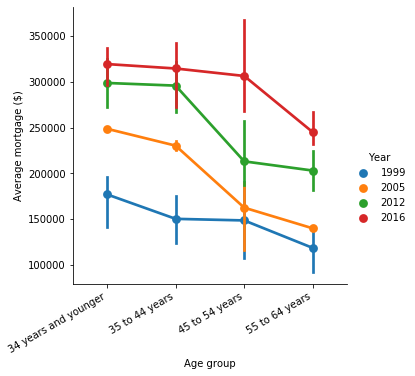

In [18]:
fig1 = sns.catplot(x='Age group', y='VALUE', hue='REF_DATE', kind='point', data=df_final)
fig1.set(xlabel='Age group', ylabel='Average mortgage ($)')
fig1._legend.set_title("Year")
fig1.fig.autofmt_xdate();

As seen in plot, the average mortgage values decrease as age is increased and the average mortgage values have increased over the years. Calculations below can quantify these changes:

In [19]:
#Grouping by year and age:
df_group1 = df_final.groupby(['REF_DATE', 'Age group']).VALUE.mean().reset_index()

#Sorting to get descending age order:
df_group1 = df_group1.sort_values(['REF_DATE', 'Age group'], ascending=[True, False])

#Calculating percent change between the youngest and oldest age groups (gap of 3 rows) in each year:
df_group1['Percent_Change'] = df_group1['VALUE'].pct_change(3)

#The only pct_change() of our interest here is the changes between the oldest and youngest age groups which
#is shown in rows of age group of 34 years and younger (due to the gap of three rows and the presence of number "3" 
#in the pct_change() function above). Therefore, we can create a dataframe just with this specific age group.
df_group2 = df_group1.loc[df_group1['Age group'] == '34 years and younger']
df_group2

,REF_DATE,Age group,VALUE,Percent_Change
0,1999,34 years and younger,177133.333333,0.493956
4,2005,34 years and younger,248900.000000,0.777857
8,2012,34 years and younger,299000.000000,0.471457
12,2016,34 years and younger,319666.666667,0.304052


As shown above, while in year 1999 population of under 34 years of age had 50% more in mortgage compared to the population of 55-64 years, this gap jumps to 78% in 2005. For years 2012 and 2016, this mortgage difference between the youngest and oldest generation decreases back down to 47% and 30%, respectively.

In [20]:
#Grouping by year:
df_group3 = df_final.groupby(['REF_DATE']).VALUE.mean().reset_index()
df_group3

,REF_DATE,VALUE
0,1999,148691.666667
1,2005,191100.000000
2,2012,253250.000000
3,2016,296575.000000


As calculated above, the average mortgage values have increased from 1999 to 2016. The mortgage values in 2016 are twice as average mortgage values in 1999.

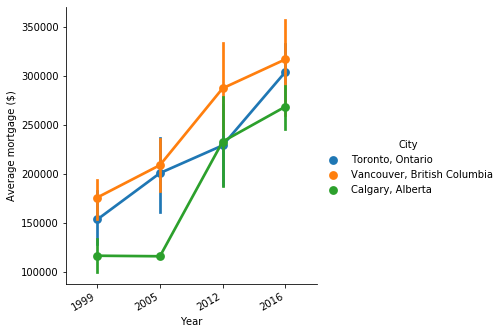

In [21]:
fig2 = sns.catplot(x='REF_DATE', y='VALUE', hue='GEO', kind='point', data=df_final)
fig2.set(xlabel='Year', ylabel='Average mortgage ($)')
fig2._legend.set_title("City")
fig2.fig.autofmt_xdate();

Plot shows that Vancouver has the highest average of mortgage values, followed by Toronto, with Calgary showing the lowest amounts of average mortgage values throughout all years investigated here. Even though in 2012, the average mortgage values in Calgary slightly pass the average mortgage values of Toronto, they fall back to below the average values of both the other two cities in 2016. These observations can be quantified using the calculations below:

In [22]:
#Grouping by city:
df_group4 = df_final.groupby(['GEO']).VALUE.mean().reset_index()

#Calculating percent change between Calgary/Toronto and Toronto/Vancouver in each year:
df_group4['Percent_Change'] = df_group4['VALUE'].pct_change()
df_group4

,GEO,VALUE,Percent_Change
0,"Calgary, Alberta",193000.000000,NaN
1,"Toronto, Ontario",221918.750000,0.149838
2,"Vancouver, British Columbia",252835.714286,0.139317


As calculated above, the average mortgage values in Toronto are 15% higher than the mortgage values in Calgary, and the average mortgage values in Vancouver are 14% higher than the mortgage values in Toronto.

In [23]:
#Grouping by city and year:
df_group5 = df_final.groupby(['GEO', 'REF_DATE']).VALUE.mean().reset_index()

#Calculating percent change between years for each city:
df_group5['Percent_Change'] = df_group5['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The year "1999" rows can be 
#dropped since data for their preceding years are not available in the dataframe, and therefore their calculated 
#pct_change() is meaningless in the context of our analysis.
df_group6 = df_group5.loc[df_group5['REF_DATE'] != 1999]
df_group6

,GEO,REF_DATE,VALUE,Percent_Change
1,"Calgary, Alberta",2005,116000.0,-0.004719
2,"Calgary, Alberta",2012,233050.0,1.009052
3,"Calgary, Alberta",2016,268675.0,0.152864
5,"Toronto, Ontario",2005,200900.0,0.308369
6,"Toronto, Ontario",2012,229150.0,0.140617
7,"Toronto, Ontario",2016,304075.0,0.326969
9,"Vancouver, British Columbia",2005,209050.0,0.187953
10,"Vancouver, British Columbia",2012,287450.0,0.375030
11,"Vancouver, British Columbia",2016,316975.0,0.102714


As seen above, while the highest jumps in mortgage values among consequent data points of Toronto and Vancouver is 33% and 38% respectively, average mortgage values for Calgary have a 100% increase in value from 2005 to 2012, which is the highest rate of increase among consequent data points of all cities.

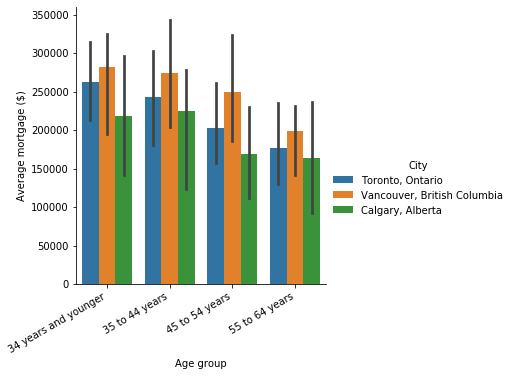

In [24]:
fig3 = sns.catplot(x='Age group', y='VALUE', hue='GEO', kind='bar', data=df_final)
fig3.set(xlabel='Age group', ylabel='Average mortgage ($)')
fig3._legend.set_title("City")
fig3.fig.autofmt_xdate();

As seen in plot and also seen previously, the general trend is decrease of average mortgage values as age increases in all cities. The following calculations are carried out for quantifying the mortgage trends for each age group and in each city:

In [25]:
#Grouping by city and age group:
df_group7 = df_final.groupby(['GEO', 'Age group']).VALUE.mean().reset_index()

#Calculating percent change between age groups for each city:
df_group7['Percent_Change'] = df_group7['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The age group "34 years and younger" 
#rows can be dropped since data of their previous rows belong to another city, and therefore their calculated 
#pct_change() is meaningless in the context of our analysis.
df_group8 = df_group7.loc[df_group7['Age group'] != '34 years and younger']
df_group8

,GEO,Age group,VALUE,Percent_Change
1,"Calgary, Alberta",35 to 44 years,225266.666667,0.027208
2,"Calgary, Alberta",45 to 54 years,169900.000000,-0.245783
3,"Calgary, Alberta",55 to 64 years,164500.000000,-0.031783
5,"Toronto, Ontario",35 to 44 years,243225.000000,-0.076244
6,"Toronto, Ontario",45 to 54 years,203650.000000,-0.162709
7,"Toronto, Ontario",55 to 64 years,177500.000000,-0.128407
9,"Vancouver, British Columbia",35 to 44 years,274050.000000,-0.027617
10,"Vancouver, British Columbia",45 to 54 years,249875.000000,-0.088214
11,"Vancouver, British Columbia",55 to 64 years,199500.000000,-0.201601


The average mortgage values for the two younger age groups (34 years and younger & 35-44 years) have slight differences in all cities (only 3% difference in Calgary and Vancouver, and 8% difference in Toronto).
While Toronto shows consistent decrease in mortgage values as age is increased (8%, 16%, and 13% decreases between each of the two consequent age groups), Calgary and Vancouver show minimal mortgage differences (from 3% to 9%) between most age groups but also have one large mortgage gap between two age groups. Calgary has the its highest mortgage gap of 24% decrease between middle-aged groups (35-44 years & 45-54 years), for Vancouver, the significant difference of 20% is observed between the older-aged groups (45-54 years and 55-64 years).